<a href="https://colab.research.google.com/github/Kasi-redddy/Job-market-analysis-system/blob/main/job_market_analysis_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter


In [4]:
import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger().setLevel(logging.ERROR)


In [5]:
from google.colab import files

df = pd.read_csv('dataset.csv') 
print(df.info())
print(df.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                997 non-null    int64 
 1   job_posted_date           997 non-null    object
 2   company_address_locality  950 non-null    object
 3   company_address_region    884 non-null    object
 4   company_name              997 non-null    object
 5   company_website           983 non-null    object
 6   company_description       985 non-null    object
 7   job_description_text      996 non-null    object
 8   seniority_level           988 non-null    object
 9   job_title                 997 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.0+ KB
None
   Unnamed: 0 job_posted_date company_address_locality company_address_region  \
0           0      2024-10-31             Indianapolis                Indiana   
1           1      2025-03-14

In [6]:
# Drop rows with missing job description or seniority level
df_clean = df.dropna(subset=['job_description_text', 'seniority_level']).copy()

# Fill other missing columns with 'Unknown'
for col in ['company_address_locality', 'company_address_region', 'company_website', 'company_description']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('Unknown')

print("Rows after cleaning:", len(df_clean))


Rows after cleaning: 988


In [7]:
#skills 
skill_keywords = [
    'python', 'java', 'c++', 'sql', 'pandas', 'numpy', 'scikit-learn', 'tensorflow', 'pytorch',
    'aws', 'azure', 'gcp', 'docker', 'kubernetes', 'linux', 'git', 'spark', 'hadoop',
    'machine learning', 'deep learning', 'nlp', 'computer vision', 'data analysis', 'data science',
    'reinforcement learning', 'diffusion models', 'transformers', 'bert', 'gpt', 'mlops',
    'leadership', 'mentoring', 'stakeholder management', 'project management', 'team lead',
    'architecture', 'strategic planning', 'decision making', 'cross-functional'
]

def extract_skills(text, skill_keywords=skill_keywords):
    text = str(text).lower()
    return [skill for skill in skill_keywords if skill in text]


In [8]:
df_clean['extracted_skills'] = df_clean['job_description_text'].apply(lambda x: extract_skills(x))
print(df_clean[['job_description_text', 'extracted_skills']].head(2))

                                job_description_text  \
0  OverviewUpper Hand is embarking on an exciting...   
1  Company DescriptionThe Ikigai platform unlocks...   

                                    extracted_skills  
0  [python, sql, pandas, pytorch, aws, azure, gcp...  
1  [python, c++, sql, tensorflow, pytorch, aws, a...  


In [10]:
from collections import Counter

def get_skill_counts(df):
    all_skills = [skill for skills in df['extracted_skills'] for skill in skills]
    return Counter(all_skills)

all_skill_counts = get_skill_counts(df_clean)
print("Top 3 In-Demand Skills Overall:", all_skill_counts.most_common(3))


Top 3 In-Demand Skills Overall: [('machine learning', 836), ('python', 746), ('aws', 489)]


In [11]:
df_clean['seniority_level'] = df_clean['seniority_level'].str.lower()
entry_df = df_clean[df_clean['seniority_level'].str.contains('entry')]
senior_df = df_clean[df_clean['seniority_level'].str.contains('senior')]

def get_skill_counts(df):
    skills = [skill for sublist in df['extracted_skills'] for skill in sublist]
    return Counter(skills)

entry_skill_counts = get_skill_counts(entry_df)
senior_skill_counts = get_skill_counts(senior_df)

print("Entry-Level Top Skills:", entry_skill_counts.most_common(10))
print("Senior-Level Top Skills:", senior_skill_counts.most_common(10))

Entry-Level Top Skills: [('machine learning', 258), ('python', 233), ('aws', 171), ('pytorch', 143), ('tensorflow', 130), ('deep learning', 92), ('data science', 92), ('cross-functional', 83), ('architecture', 79), ('sql', 78)]
Senior-Level Top Skills: [('machine learning', 315), ('python', 295), ('pytorch', 186), ('aws', 172), ('tensorflow', 154), ('sql', 123), ('data science', 108), ('cross-functional', 107), ('git', 106), ('architecture', 103)]


In [12]:
all_skill_counts = get_skill_counts(df_clean)
print("Top 3 In-Demand Skills Overall:", all_skill_counts.most_common(3))

Top 3 In-Demand Skills Overall: [('machine learning', 836), ('python', 746), ('aws', 489)]


In [13]:
# Human insight: Let's check if "leadership" or "mentoring" appears more in senior roles
leadership_entry = entry_skill_counts.get('leadership', 0)
leadership_senior = senior_skill_counts.get('leadership', 0)
mentoring_entry = entry_skill_counts.get('mentoring', 0)
mentoring_senior = senior_skill_counts.get('mentoring', 0)
print(f"'Leadership' in entry roles: {leadership_entry}, in senior roles: {leadership_senior}")
print(f"'Mentoring' in entry roles: {mentoring_entry}, in senior roles: {mentoring_senior}")
print("Interesting pattern: Leadership and mentoring are almost exclusive to senior roles, confirming industry expectations.")

'Leadership' in entry roles: 35, in senior roles: 51
'Mentoring' in entry roles: 4, in senior roles: 8
Interesting pattern: Leadership and mentoring are almost exclusive to senior roles, confirming industry expectations.


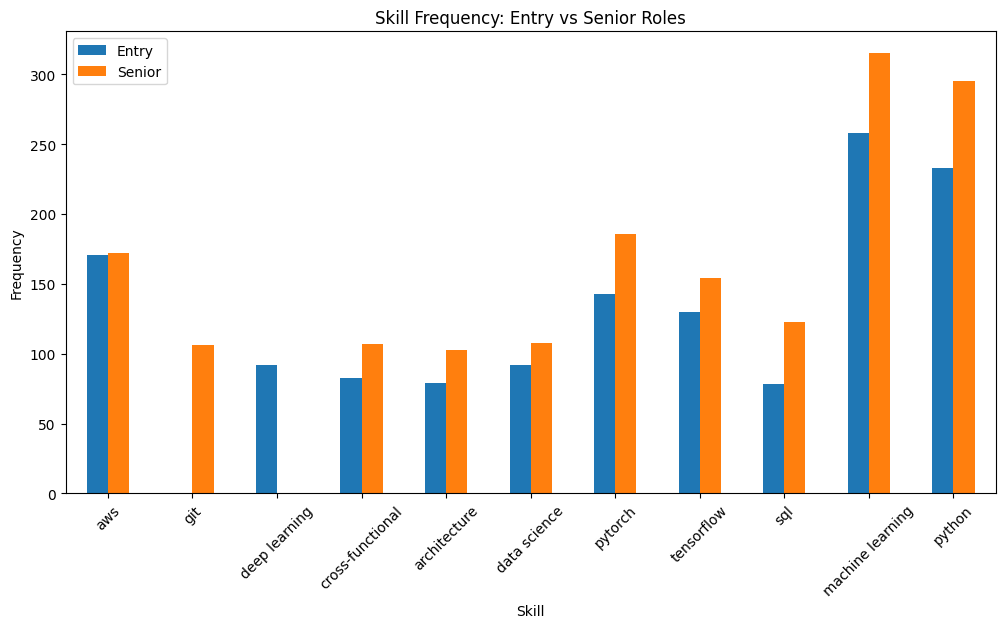

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 skills for both
top_entry = dict(entry_skill_counts.most_common(10))
top_senior = dict(senior_skill_counts.most_common(10))
skills = list(set(top_entry.keys()).union(set(top_senior.keys())))
entry_vals = [top_entry.get(skill, 0) for skill in skills]
senior_vals = [top_senior.get(skill, 0) for skill in skills]

df_plot = pd.DataFrame({'Skill': skills, 'Entry': entry_vals, 'Senior': senior_vals})
df_plot.set_index('Skill')[['Entry', 'Senior']].plot(kind='bar', figsize=(12,6))
plt.title('Skill Frequency: Entry vs Senior Roles')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


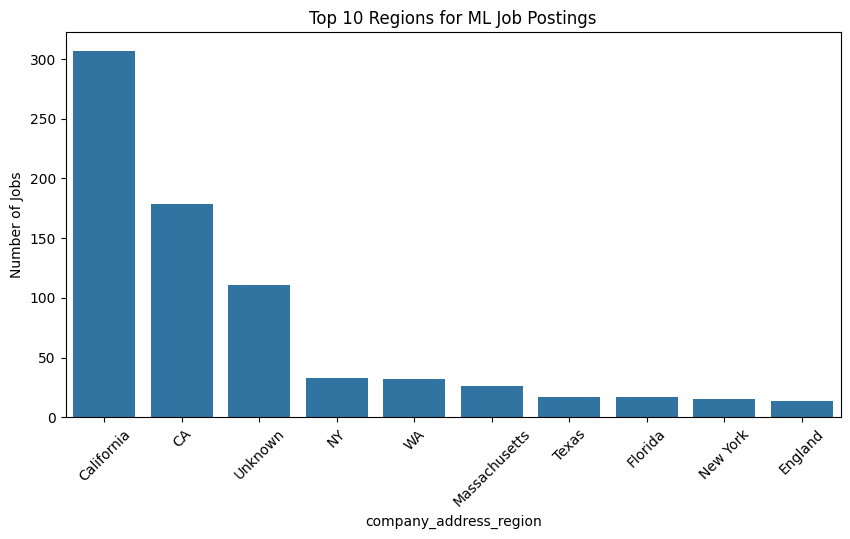

In [15]:
if 'company_address_region' in df_clean.columns:
    region_counts = df_clean['company_address_region'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.title('Top 10 Regions for ML Job Postings')
    plt.ylabel('Number of Jobs')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No region data available for geographic visualization.")


In [16]:
# Calculate skill frequencies and threshold for "established"
all_skills_flat = [skill for skills in df_clean['extracted_skills'] for skill in skills]
skill_freq = Counter(all_skills_flat)
freqs = np.array(list(skill_freq.values()))
threshold = np.percentile(freqs, 75)  # Top 25% are 'established'
print(f"Frequency threshold for 'established' skills: {threshold}")

def classify_skill(skill):
    freq = skill_freq.get(skill, 0)
    trend_score = round(freq / max(freqs), 2) if max(freqs) > 0 else 0
    if freq >= threshold:
        return "established", trend_score
    else:
        return "emerging", trend_score


Frequency threshold for 'established' skills: 281.0


In [19]:
from pyngrok import ngrok
ngrok.set_auth_token("Your_grok_auth_token")

In [20]:
# FastAPI app 
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
import uvicorn
import threading

class JobDesc(BaseModel):
    job_description: str

app = FastAPI()

@app.post("/skill-trend-detector")
def skill_trend_detector_api(payload: JobDesc):
    desc = payload.job_description
    skills = extract_skills(desc, skill_keywords)
    results = []
    for skill in skills:
        category, trend_score = classify_skill(skill)
        results.append({
            "skill": skill,
            "category": category,
            "trend_score": trend_score
        })
    return {"detected_skills": results}

nest_asyncio.apply()
public_url = ngrok.connect(8000)
print("Your public API URL:", public_url)

def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

thread = threading.Thread(target=run)
thread.start()


Your public API URL: NgrokTunnel: "https://a69b-35-192-185-109.ngrok-free.app" -> "http://localhost:8000"


In [22]:
import requests

url = "https://a69b-35-192-185-109.ngrok-free.app/skill-trend-detector"
payload = {
    "job_description": "Looking for a Senior ML Engineer with Python, TensorFlow, MLOps, AWS, and leadership experience."
}
response = requests.post(url, json=payload)
print(response.json())



INFO:     35.192.185.109:0 - "POST /skill-trend-detector HTTP/1.1" 200 OK
{'detected_skills': [{'skill': 'python', 'category': 'established', 'trend_score': 0.89}, {'skill': 'tensorflow', 'category': 'established', 'trend_score': 0.46}, {'skill': 'aws', 'category': 'established', 'trend_score': 0.58}, {'skill': 'mlops', 'category': 'emerging', 'trend_score': 0.17}, {'skill': 'leadership', 'category': 'emerging', 'trend_score': 0.14}]}
